<a href="https://colab.research.google.com/github/shishirsingh645/MACHINE-LEARNING/blob/main/SAHILSIR_LAB_ASSIGN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load library

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [153]:
data = pd.read_csv('/content/Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,longitude,latitude
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,794633.0769,3258228.310
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,799273.3235,3258228.310
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,780712.3370,3253588.064
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,785352.5836,3253588.064
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,789992.8302,3253588.064


perform basic check of data

In [118]:
data.shape

(366, 14)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
 12  longitude               366 non-null    float64
 13  latitude                366 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory

In [155]:
data.describe().T.style.background_gradient(cmap = "Reds")

,count,mean,std,min,25%,50%,75%,max
day,366.000000,15.756831,8.823592,1.000000,8.000000,16.000000,23.000000,31.000000
pressure,366.000000,1013.742623,6.414776,998.500000,1008.500000,1013.000000,1018.100000,1034.600000
maxtemp,366.000000,26.191257,5.978343,7.100000,21.200000,27.750000,31.200000,36.300000
temparature,366.000000,23.747268,5.632813,4.900000,18.825000,25.450000,28.600000,32.400000
mintemp,366.000000,21.894536,5.594153,3.100000,17.125000,23.700000,26.575000,30.000000
dewpoint,366.000000,19.989071,5.997021,-0.400000,16.125000,21.950000,25.000000,26.700000
humidity,366.000000,80.177596,10.062470,36.000000,75.000000,80.500000,87.000000,98.000000
cloud,366.000000,71.128415,21.798012,0.000000,58.000000,80.000000,88.000000,100.000000
sunshine,366.000000,4.419399,3.934398,0.000000,0.500000,3.500000,8.200000,12.100000
winddirection,365.000000,101.506849,81.723724,10.000000,40.000000,70.000000,190.000000,350.000000


perform cleaning of data

In [156]:
data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [157]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed', 'longitude', 'latitude'],
      dtype='object')

In [158]:
#between  'sunshine', '         winddirection' thwir is space remove that
#note this line i have taken hint from online how to remove this
data.rename(str.strip,
          axis='columns',
          inplace=True)

data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed', 'longitude', 'latitude'],
      dtype='object')

In [162]:
for col in data.columns:

  # Checking if the column contains
  # any null values
  if data[col].isnull().sum() > 0:
    val = data[col].mean()
    data[col] = data[col].fillna(val)

data.isnull().sum()


,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


explotart data analysis

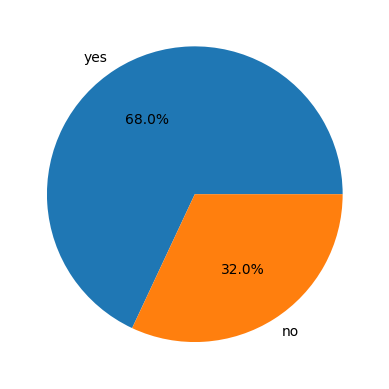

In [163]:
plt.pie(data['rainfall'].value_counts().values,
        labels = data['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()


In [164]:
features = list(data.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'longitude', 'latitude']


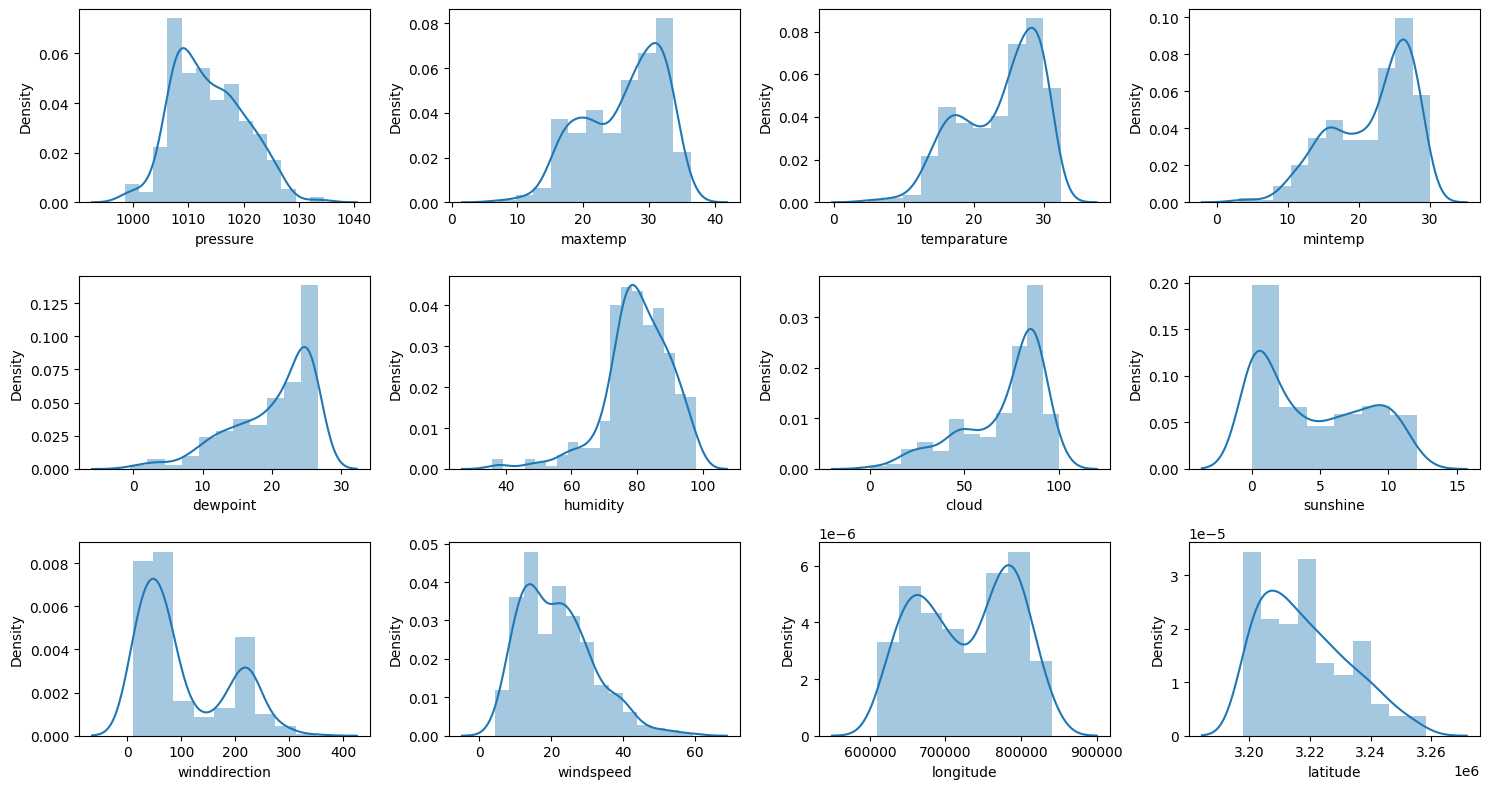

In [165]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(data[col])
plt.tight_layout()
plt.show()


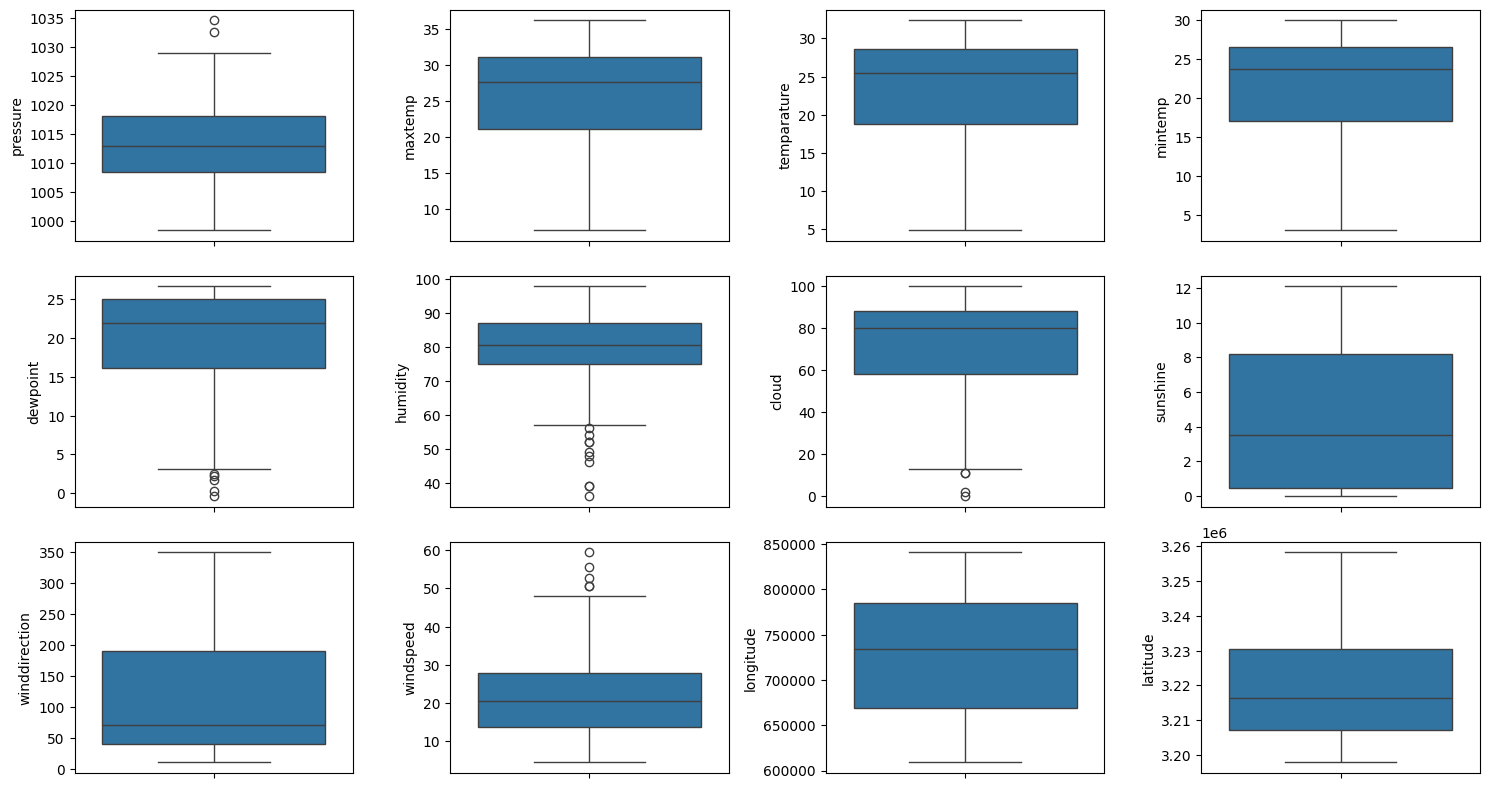

In [166]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(data[col])
plt.tight_layout()
plt.show()


In [167]:
data.replace({'yes':1, 'no':0}, inplace=True)  #convert catogrical data to binary

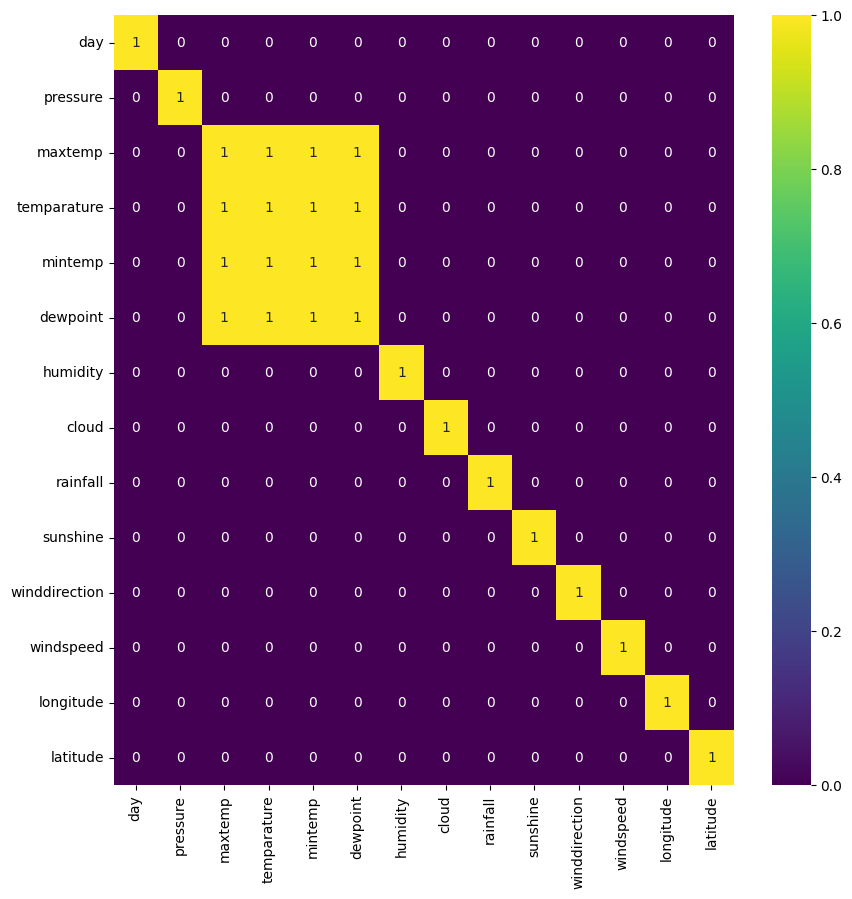

In [168]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr() > 0.8,
           annot=True,
           cmap='viridis')
plt.show()


highly corelated drop max temp min temp

In [169]:
data.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)


In [170]:
features = data.drop(['day', 'rainfall'], axis=1)

target = data.rainfall

In [171]:
X_train, X_val,Y_train, Y_val = train_test_split(features,target,test_size=0.2,stratify=target,random_state=42)
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [172]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [173]:
model = LogisticRegression()

model.fit(X, Y)

#predict
train_preds = model.predict_proba(X)
print(f'Logistic Regression : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:, 1]))

#prediction on validation
val_preds = model.predict_proba(X_val)
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:, 1]))


Logistic Regression : 
Training Accuracy :  0.8881846418019747
Validation Accuracy :  0.9091666666666667


In [179]:
print(val_preds)

[0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0]


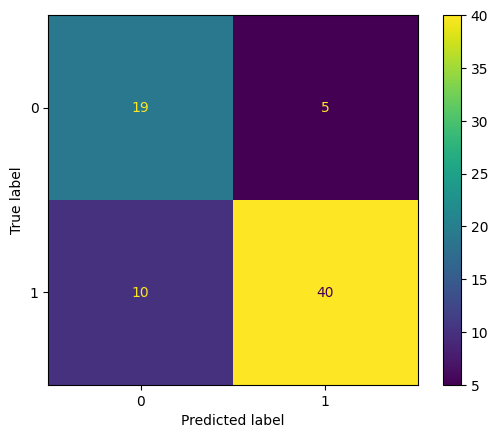

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_val, Y_val)

plt.show()


In [183]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


val_preds = model.predict(X_val)

r2 = r2_score(Y_val, val_preds)
mse = mean_squared_error(Y_val, val_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_val, val_preds)

print(f'R² score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

print(metrics.classification_report(Y_val, model.predict(X_val)))


R² score: 0.07500000000000007
Mean Squared Error (MSE): 0.20270270270270271
Root Mean Squared Error (RMSE): 0.45022516889074815
Mean Absolute Error (MAE): 0.20270270270270271
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.89      0.80      0.84        50

    accuracy                           0.80        74
   macro avg       0.77      0.80      0.78        74
weighted avg       0.81      0.80      0.80        74



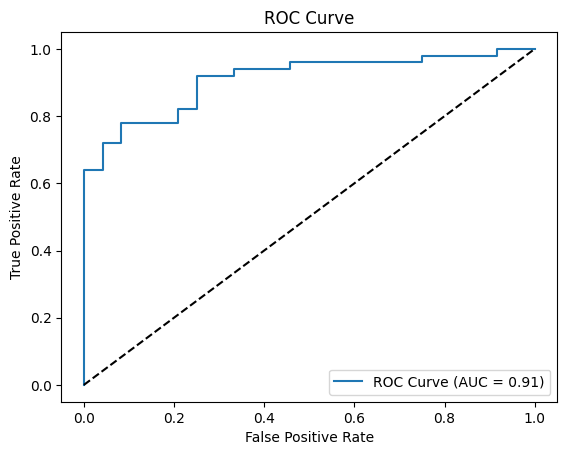

Predicted probabilities for class 1:
[0.21799355 0.91656738 0.85287617 0.92865363 0.03321186 0.73284055
 0.79785453 0.72219781 0.728247   0.01219612 0.77184668 0.87492797
 0.83334843 0.02728896 0.43863123 0.87290897 0.08002493 0.70148826
 0.8344616  0.75713828 0.62012695 0.44793845 0.81196285 0.74362944
 0.34843786 0.91604877 0.95255026 0.12878212 0.84534523 0.50084495
 0.78329034 0.0801193  0.50999934 0.92808912 0.02595981 0.160976
 0.33872827 0.83343873 0.95023284 0.94237358 0.72677626 0.16650186
 0.14873512 0.77718215 0.53847356 0.06483069 0.6877549  0.82694501
 0.40099936 0.93601421 0.92335462 0.80740956 0.97669132 0.34280495
 0.96448554 0.62099505 0.40515478 0.7503338  0.82975094 0.4402955
 0.26924199 0.39726149 0.30823511 0.50763783 0.90102188 0.22955596
 0.81846608 0.36300471 0.68097407 0.45425692 0.33442438 0.67780891
 0.2157257  0.33016803]


In [184]:
from sklearn.metrics import roc_curve, roc_auc_score

val_probs = model.predict_proba(X_val)[:, 1]


fpr, tpr, _ = roc_curve(Y_val, val_probs)
roc_auc = roc_auc_score(Y_val, val_probs)

#ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print predicted probabilities for the positive class
print("Predicted probabilities for class 1:")
print(val_probs)


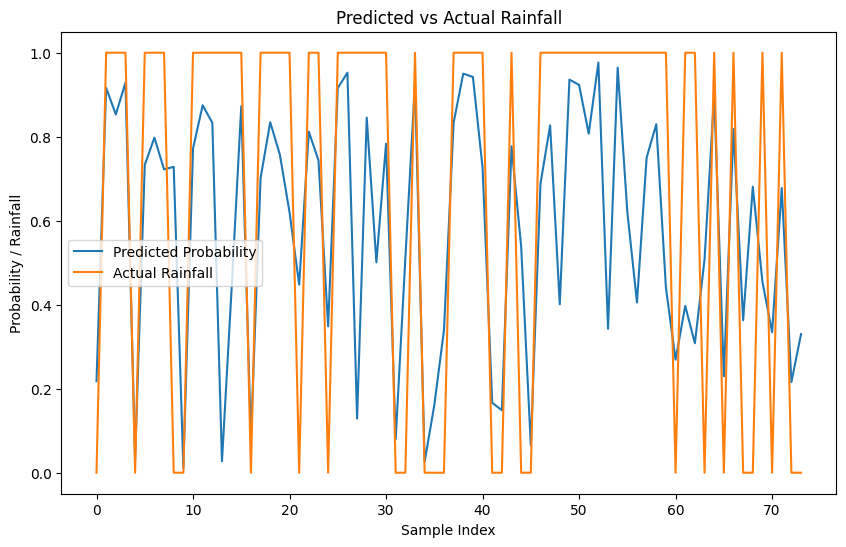

In [181]:
val_preds = model.predict_proba(X_val)

predicted_probabilities = val_preds[:, 1]

actual_values = Y_val.values

# line chart
plt.figure(figsize=(10, 6))
plt.plot(predicted_probabilities, label='Predicted Probability')
plt.plot(actual_values, label='Actual Rainfall')
plt.xlabel('Sample Index')
plt.ylabel('Probability / Rainfall')
plt.title('Predicted vs Actual Rainfall')
plt.legend()
plt.show()


In [ ]:
result = pd.DataFrame

In [186]:

import pandas as pd
result = pd.DataFrame(X_val, columns=features.columns)
result['Actual Rainfall'] = Y_val.values
result['Predicted Probability'] = predicted_probabilities
print(result.head())


   pressure  temparature  dewpoint  humidity     cloud  sunshine  \
0  1.033070    -0.977147 -1.857154 -2.369509 -0.785880 -0.451528   
1  1.108610    -0.756555 -0.752719 -0.269956  0.930000 -1.155979   
2 -1.187794     0.431251  0.709492  0.916748  0.480602 -0.840190   
3 -0.356858    -0.485056  0.133941  1.738313  0.930000 -1.301727   
4  1.516524    -1.248646 -1.297159 -0.543810 -1.357840  1.273164   

   winddirection  windspeed  longitude  latitude  Actual Rainfall  \
0      -1.006999   1.356326   1.163244 -1.121478                0   
1      -0.644969   1.711648   1.824212 -1.121478                1   
2       1.527213   0.527244  -0.305573  0.182681                1   
3      -0.886322  -0.055088  -0.525896  0.508720                1   
4      -0.524292   0.645684   1.163244  1.160800                0   

   Predicted Probability  
0               0.217994  
1               0.916567  
2               0.852876  
3               0.928654  
4               0.033212  


In [187]:
result.to_csv('rainfall_predictions.csv', index=False)

#

In [195]:
# prompt: SELECT THE LATITUDE LONGITUDE  COLUMN FROM DATA1 AND PLOT THE COORDINATES IN MAP AND DISPLAY , NOTE COORDINATES IN WGS 1984 UTM ZONE 46 N
#NOTE I DONT KNOW HOW TO PLOT THIS TO UNDERSTAND I HAVE TAKEN HELP FROM GENERATIVE AI

data1= pd.read_csv('/content/Rainfall.csv')
data1.head()
import pandas as pd
# Select longitude and latitude columns
utm_data = data1[['longitude', 'latitude']]

# Define UTM and WGS84 coordinate systems
utm_proj = pyproj.Proj(proj='utm', zone=46, ellps='WGS84', north=True)  # UTM Zone 46N
wgs84_proj = pyproj.Proj(init='epsg:4326')  # WGS84

# Convert UTM coordinates to WGS84
wgs84_coords = utm_data.apply(lambda row: pyproj.transform(utm_proj, wgs84_proj, row['longitude'], row['latitude']), axis=1)

# Extract longitude and latitude from the result
wgs84_coords = wgs84_coords.apply(pd.Series)
wgs84_coords.columns = ['longitude_wgs84', 'latitude_wgs84']

# Display the converted coordinates
print(wgs84_coords)

# Create a map centered on the mean coordinates
map_center = [wgs84_coords['latitude_wgs84'].mean(), wgs84_coords['longitude_wgs84'].mean()]
map_obj = folium.Map(location=map_center, zoom_start=10)

# Add markers for each location
for index, row in wgs84_coords.iterrows():
  folium.Marker([row['latitude_wgs84'], row['longitude_wgs84']]).add_to(map_obj)

# Display the map
display(map_obj)


     longitude_wgs84  latitude_wgs84
0          96.036567       29.418841
1          96.084333       29.417743
2          95.892067       29.380207
3          95.939821       29.379161
4          95.987574       29.378099
..               ...             ...
361        95.164910       28.891615
362        95.212466       28.890842
363        95.260021       28.890052
364        95.307574       28.889246
365        95.355125       28.888423

[366 rows x 2 columns]
